# <h1 style="font-family:verdana;font-size:45px"> <center>💁Customer Personality Analysis 💬</center> </h1>
<p><center style="color:#159364; font-family:cursive;">Not Just A NoteBook🔥, Mastering Clustering.....✅</center></p>

***
<img src="https://cdn.dribbble.com/users/1322388/screenshots/16973904/media/9d0e0b7dd96083e7ef41f7a6af57b6eb.jpg?resize=1000x750&vertical=center" style="width: 1300px; height: 1100px;">
<div style="color:black;font-size:18px; font-family:verdana; line-height: 1.7em;">
    Customer Personality Analysis is a detailed analysis of a company’s ideal customers. 
    It helps a business to better understand its customers and makes it easier for them 
    to modify products according to the specific needs, behaviors, and concerns of 
    different types of customers.<br><br>
    Customer personality analysis helps a business to modify its product based on its 
    target customers from different types of customer segments.<br><br>
    For example, instead of spending money to market a new product to every customer in 
    the company’s database, a company can analyze which customer segment is most likely 
    to buy the product and then market the product only to that particular segment.
</div>
<br>
<div style="color:green;font-size:18px; font-family:verdana;">The main objective here is -<br>

<ol>
    <li>What people say about your product: what gives customers’ attitude towards the 
product.
</li>
    <li>What people do: which reveals what people are doing rather than what they are 
saying about your product.
</li>
</ol>
</div>

***
<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:pink;font-family:verdana;color:green;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. DATA PREPROCESSING](#3)
    
* [4. EXPLORATORY DATA ANALYSIS](#4)   
    
* [5. MODEL BUILDING](#5) 
      
* [6. MODEL EVALUATION](#6)
    
* [7. EVALUATING MODELS](#7)
    
* [8. CLUSTERING ANALYSIS](#8)
    
* [9. BUILDING MULTICLASSIFICATION MODEL BASED ON CLUSTER LABELS](#9)
    
* [10. CONCLUSION](#10)

***

## If you have any questions❓ or need further assistance📐, feel free to contact me on [LinkedIn](https://www.linkedin.com/in/sanjay-l-15663a224).

<a id="1"></a>
# <p style="background-color:pink;font-family:verdana;color:black;font-size:120%;text-align:center;border-radius:20px 20px;">IMPORTING LIBRARIES</p>
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.cm as cm
import joblib

from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")

# Set color palette for visualizations
colors = ['green', 'orange', 'pink', 'skyblue', 'red', 'yellow']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

%matplotlib inline

<a id="2"></a>
# <p style="background-color:pink;font-family:verdana;color:black;font-size:120%;text-align:center;border-radius:20px 20px;">LOADING DATA</p>
***

In [2]:
df = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv",delimiter = "\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<a id="3"></a>
# <p style="background-color:pink;font-family:verdana;color:black;font-size:120%;text-align:center;border-radius:20px 20px;">DATA PREPROCESSING</p>
***

In [3]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<div class="alert alert-block alert-info" style="color:black; font-size:14px; font-family:verdana; line-height: 1.7em;">

Checking the null values present in the dataset.
   - In "Income" column, there are 24 null values. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<Figure size 600x400 with 0 Axes>

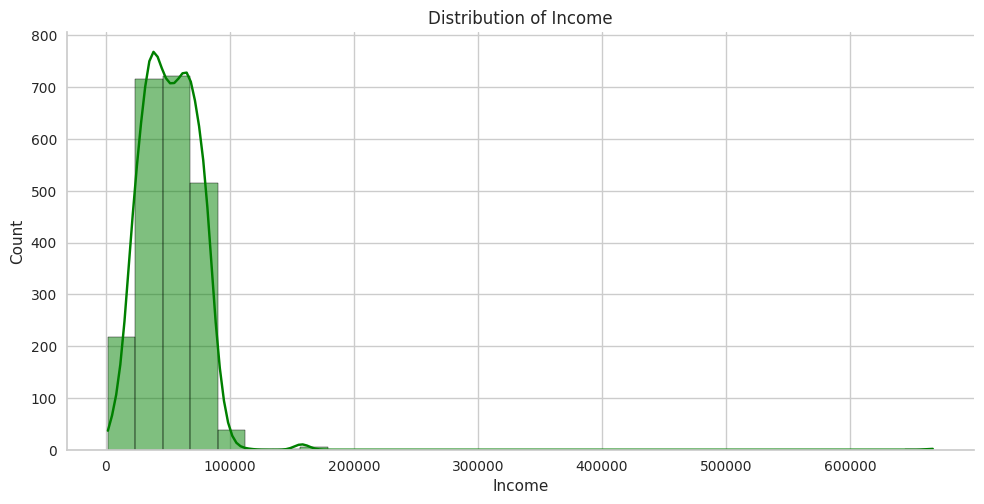

In [5]:
plt.figure(figsize=(6, 4))
sns.displot(df["Income"], kde=True, bins=30, height=5, aspect=2)
plt.title(f'Distribution of Income')
plt.show()

<div class="alert alert-block alert-info" style="color:black; font-size:14px; font-family:verdana; line-height: 1.7em;">
     &nbsp; Since, my Income column are in left distribution. So using a median to fill the null values.
</div>

In [6]:
df["Income"].fillna(df["Income"].median(),inplace= True)

In [7]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],format='%d-%m-%Y')

df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduate')

df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'With Partner')
df['Marital_Status'] = df['Marital_Status'].replace(['Alone','Divorced', 'Widow'],'Without Partner')
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO'],'Life Style Choice')
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd'],'Others')
# Its also contains Absurd

df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df["NumTotalPurchases"] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

df["Children"] = df["Kidhome"] + df["Teenhome"]

df["Age"] = 2014 - df["Year_Birth"]
df.loc[(df['Age'] >= 18) & (df['Age'] <= 24), 'AgeGroup'] = 'Young Adults'
df.loc[(df['Age'] >= 25) & (df['Age'] <= 34), 'AgeGroup'] = 'Early Adults'
df.loc[(df['Age'] >= 35) & (df['Age'] <= 44), 'AgeGroup'] = 'Mid Adults'
df.loc[(df['Age'] >= 45) & (df['Age'] <= 54), 'AgeGroup'] = 'Late Adults'
df.loc[df['Age'] >= 55, 'AgeGroup'] = 'Pre-Seniors'

In [8]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 2
Marital_Status            5
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
Expenses               1054
NumTotalPurchases        39
TotalAcceptedCmp          5
Children                  4
Age                      59
AgeGroup                  5
dtype: int64

In [9]:
df1 = df.copy()

In [10]:
numerica_col = ["Income","Age"]

for col in numerica_col:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1  # Correct IQR calculation

    LL = Q1 - (1.5 * IQR)  # Lower limit
    UL = Q3 + (1.5 * IQR)  # Upper limit

    # Cap the outliers
    df1[col] = df1[col].apply(lambda x: UL if x > UL else LL if x < LL else x)

print("Outliers have been handled")

Outliers have been handled


<a id="4"></a>
# <p style="background-color:pink;font-family:verdana;color:black;font-size:120%;text-align:center;border-radius:20px 20px;">EXPLORATORY DATA ANALYSIS</p>
***

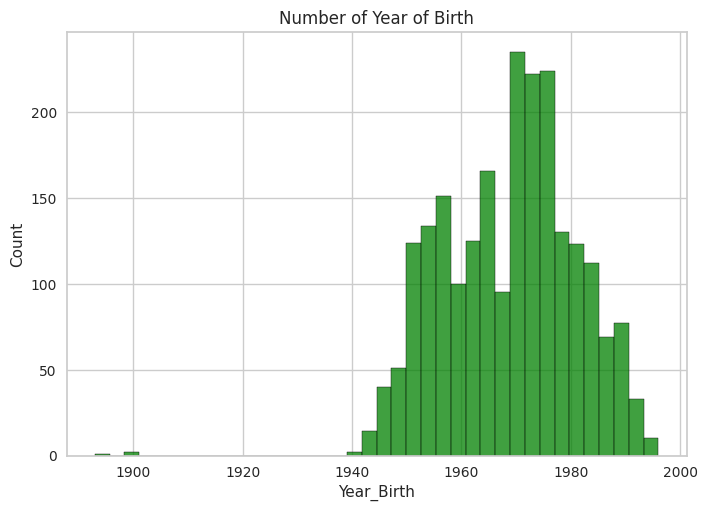

In [11]:
sns.histplot(df1.Year_Birth)
sns.color_palette("mako", as_cmap=True)
plt.title('Number of Year of Birth');

In [ ]:
value_counts = df1.AgeGroup.value_counts()
explode = [0.1] * len(value_counts) 

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(value_counts, labels=value_counts.index, autopct="%1.2f%%", explode=explode, shadow=True, startangle=180)
plt.title('Categories of AgeGroup')

plt.show()

<div class="alert alert-block alert-info" style="color:black; font-size:14px; font-family:verdana; line-height: 1.7em;">
    Age is between 18 and 24 == Young Adults<br>
    Age is between 25 and 34 == Early Adults<br>
    Age is between 35 and 44 == Mid Adults<br>
    Age is between 45 and 54 == Late Adults<br>
    Age is 55 or above == Pre-Adults
</div>

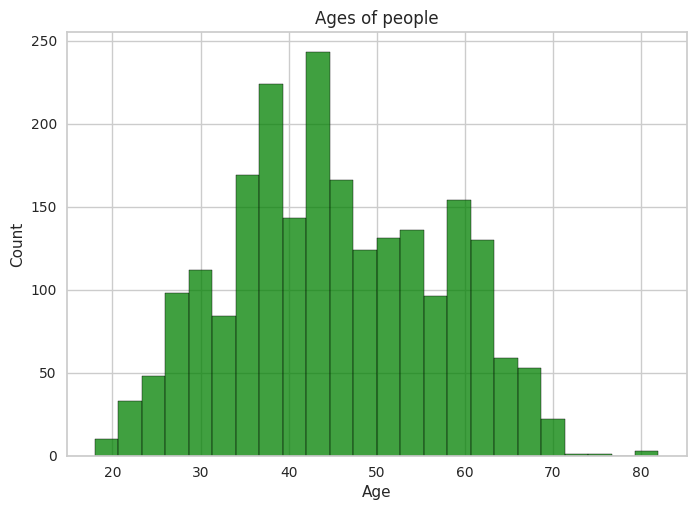

In [13]:
sns.histplot(df1.Age)
plt.title('Ages of people');

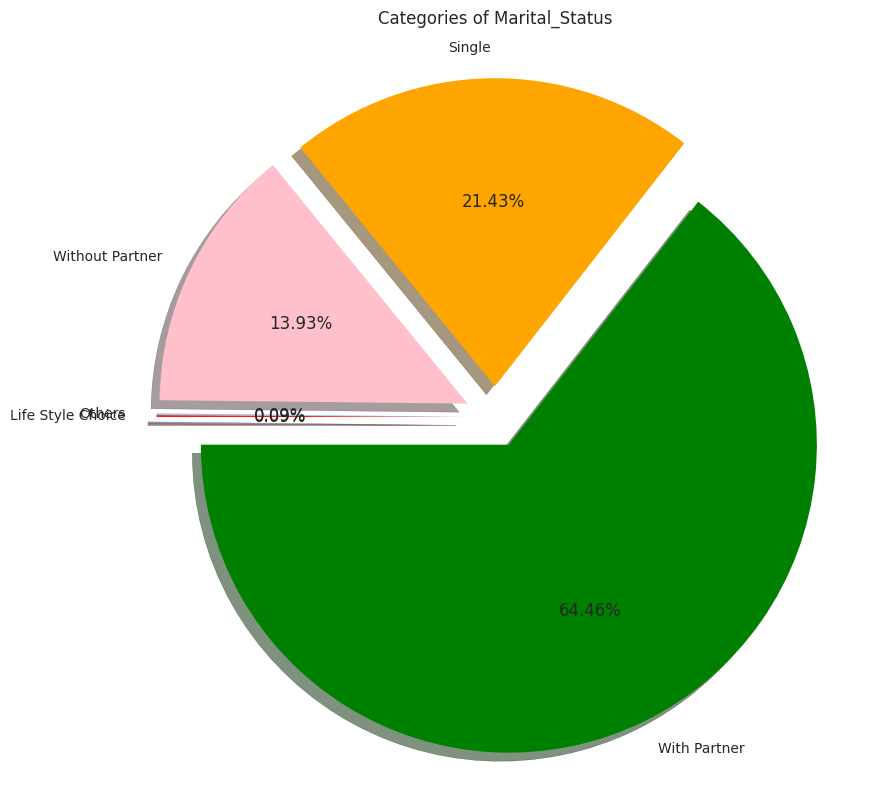

In [14]:
value_counts = df1.Marital_Status.value_counts()
explode = [0.1] * len(value_counts)

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(value_counts, labels=value_counts.index, autopct="%1.2f%%", explode=explode, shadow=True, startangle=180)
plt.title('Categories of Marital_Status')

plt.show()

In [15]:
df1["Marital_Status"].value_counts()

Marital_Status
With Partner         1444
Single                480
Without Partner       312
Others                  2
Life Style Choice       2
Name: count, dtype: int64

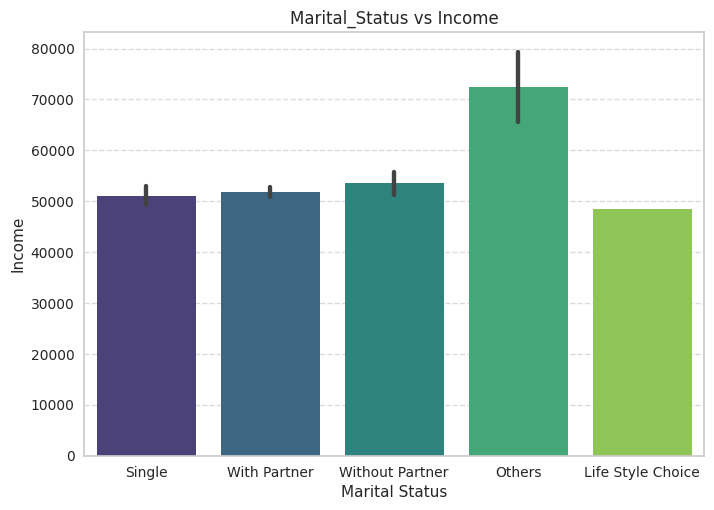

In [16]:
sns.barplot(x = df1["Marital_Status"], y = df1["Income"], palette='viridis')

plt.title('Marital_Status vs Income')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<div class="alert alert-block alert-info" style="color:black; font-size:14px; font-family:verdana; line-height: 1.7em;">
From this bar plot, we can observe that "Others: Absurd" exhibit higher income compared to the other categories.<div>

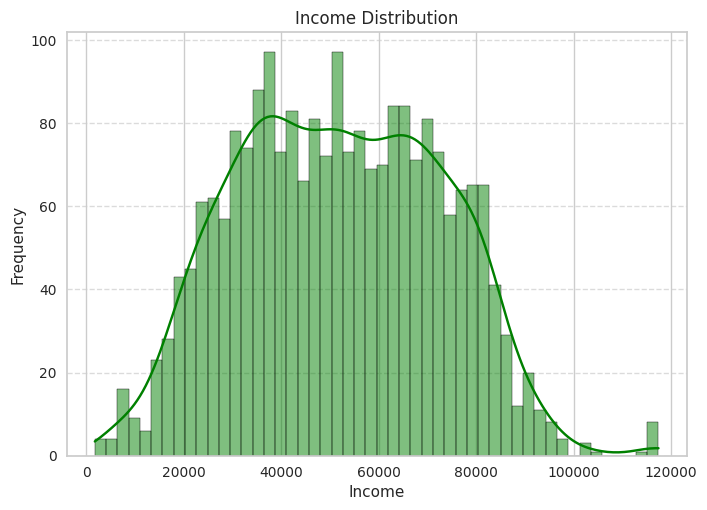

In [17]:
sns.histplot(df1['Income'], bins=50, kde=True, color='green')

# Add title and labels
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

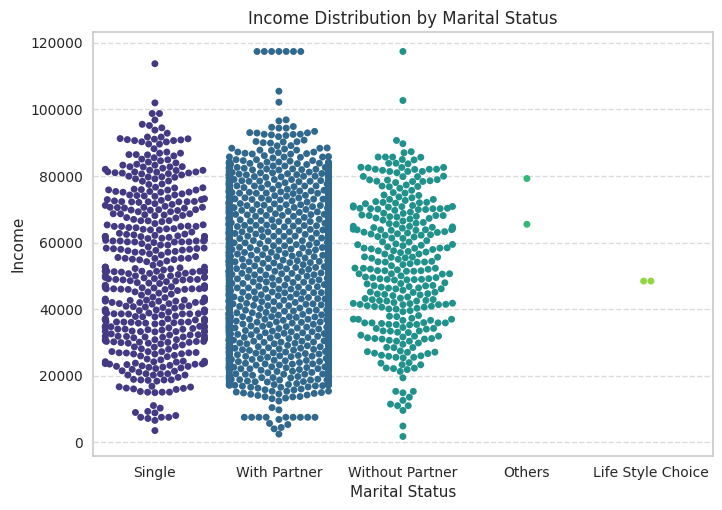

In [18]:
sns.swarmplot(x = df1["Marital_Status"], y = df1["Income"], palette='viridis')

# Add title and labels
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

<div class="alert alert-block alert-info" style="color:black; font-size:14px; font-family:verdana; line-height: 1.7em;">
    
Single: The income range is broad, with most values clustered between approximately  \\$20,000 and \\$80,000. Some outliers exceed \$100,000.

With Partner: The income distribution shows a wide range, from around \\$20,000 to just over \\$100,000, with a notable density around \\$50,000 to \\$70,000.

Without Partner: The income distribution is fairly spread out, with a concentration between \$30,000 and \\$70,000, but it also includes a few high-income outliers.

Others: This category has fewer data points, indicating a wider variation and less clustering. It includes outliers both on the lower and higher income ends.

Life Style Choice: This category has the fewest data points, showing a wide range of incomes but with significant gaps.

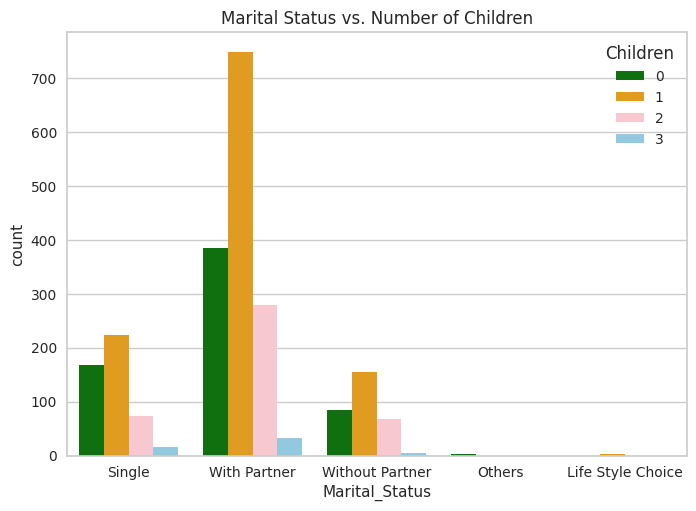

In [19]:
sns.countplot(data=df1, x='Marital_Status', hue='Children')
plt.title('Marital Status vs. Number of Children')
plt.show()

<div class="alert alert-block alert-info" style="color:black; font-size:14px; font-family:verdana; line-height: 1.7em;">
    
In the Marital Status category:
    
   - "With Partner" has more individuals.

   - "Life Style Choice" has only two individuals.

In [20]:
Marital_vs_kids = df1.groupby("Marital_Status")[['Kidhome','Teenhome','Children']].sum()
print(Marital_vs_kids)

                   Kidhome  Teenhome  Children
Marital_Status                                
Life Style Choice        0         2         2
Others                   0         0         0
Single                 223       195       418
With Partner           655       749      1404
Without Partner        117       188       305


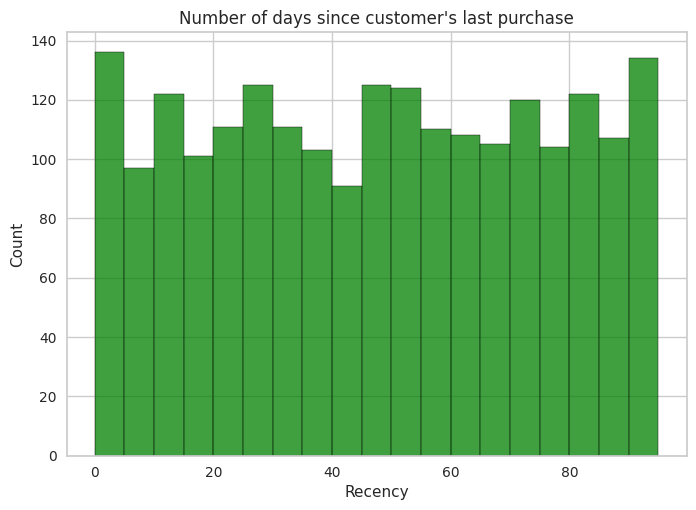

In [21]:
sns.histplot(df1.Recency, bins=np.arange(0,100,5))
plt.title("Number of days since customer's last purchase");

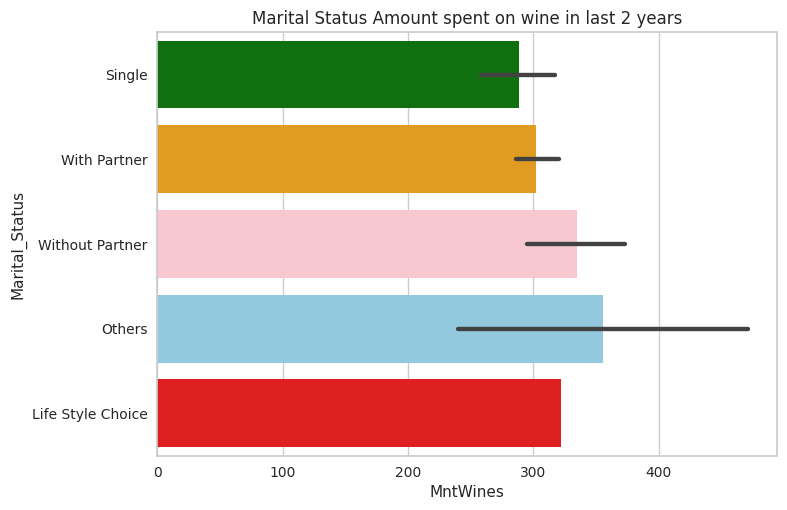

In [22]:
sns.barplot(x='MntWines', y='Marital_Status', data=df1)
plt.title('Marital Status Amount spent on wine in last 2 years');

<div class="alert alert-block alert-info" style="color:black; font-size:14px; font-family:verdana; line-height: 1.7em;">
    
Among the categories,
 - "Others: Absurd" spent the most on wine.

In [23]:
df1["Teenhome"].unique()

array([0, 1, 2])

In [24]:
df1.Children.value_counts()

Children
1    1128
0     638
2     421
3      53
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of child home in percentage')

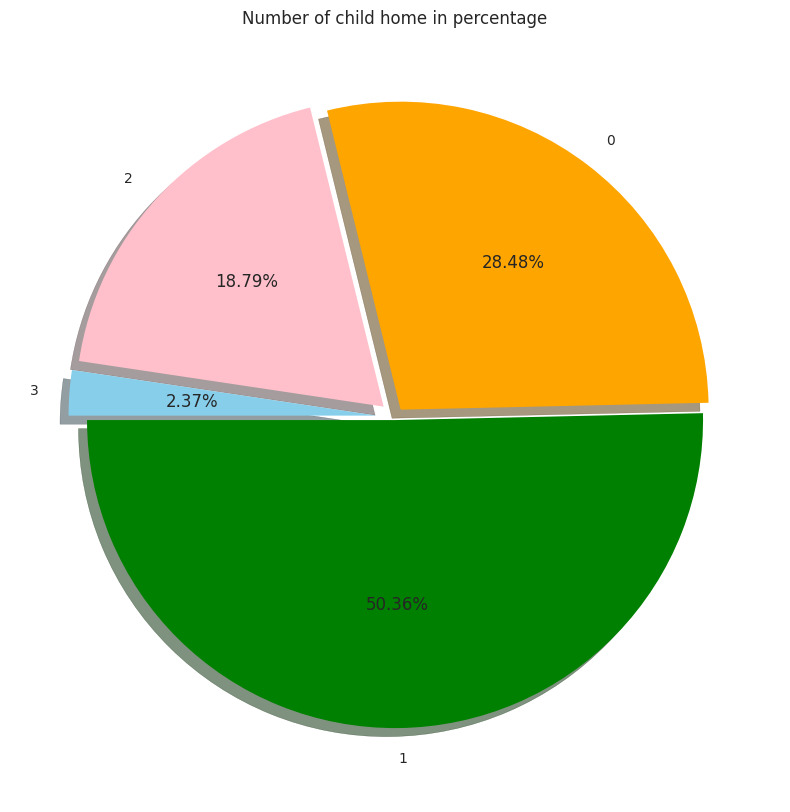

In [25]:
plt.figure(figsize=(10,10))
plt.pie(df1.Children.value_counts(), labels=df1.Children.value_counts().index ,autopct="%1.2f%%", explode=[0.01, 0.03, 0.05, 0.06], shadow=True, startangle=180)
plt.title('Number of child home in percentage')

In [26]:
high_income = df1.Income > 50000
custumer_high_income_df = df1[high_income]
custumer_high_income_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Expenses,NumTotalPurchases,TotalAcceptedCmp,Children,Age,AgeGroup
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,1617,25,0,0,57.0,Pre-Seniors
2,4141,1965,Post Graduate,With Partner,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,776,21,0,0,49.0,Late Adults
4,5324,1981,Post Graduate,With Partner,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,422,19,0,1,33.0,Early Adults
5,7446,1967,Post Graduate,With Partner,62513.0,0,1,2013-09-09,16,520,...,0,3,11,0,716,22,0,1,47.0,Late Adults
6,965,1971,Post Graduate,Without Partner,55635.0,0,1,2012-11-13,34,235,...,0,3,11,0,590,21,0,1,43.0,Mid Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Post Graduate,With Partner,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,1341,18,0,1,47.0,Late Adults
2236,4001,1946,Post Graduate,With Partner,64014.0,2,1,2014-06-10,56,406,...,0,3,11,0,444,22,1,3,68.0,Pre-Seniors
2237,7270,1981,Post Graduate,Without Partner,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,1241,19,1,0,33.0,Early Adults
2238,8235,1956,Post Graduate,With Partner,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,843,23,0,1,58.0,Pre-Seniors


### Q1: How many custumer Income above 50000?

In [27]:
high_income = custumer_high_income_df.Income.count()

print(f"The total numbers of above 5000 income custumers are {high_income}.")

The total numbers of above 5000 income custumers are 1180.


### Q2: How many money spent overall data in wines and give it's percentage overall spent money?

In [28]:
overall_mntwines = df1.MntWines.sum()
overall_money_spent = df1.Expenses.sum()
pct_of_mntwines = (overall_mntwines * 100/ overall_money_spent)

print(f"The money sent overall data in wines are {overall_mntwines} and it's percentage overall spent money is {pct_of_mntwines:.2f}%.")

The money sent overall data in wines are 680816 and it's percentage overall spent money is 50.17%.


### Q3: which year to maximum amount spent customer ?

In [29]:
df1['year'] = pd.DatetimeIndex(df1.Dt_Customer).year
df1['month'] = pd.DatetimeIndex(df1.Dt_Customer).month
df1['day'] = pd.DatetimeIndex(df1.Dt_Customer).day
df1['weekday'] = pd.DatetimeIndex(df1.Dt_Customer).weekday

df1.groupby('year')[['Expenses']].sum()

,Expenses
year,
2012,368269
2013,715425
2014,273294


<div class="alert alert-block alert-info" style="color:black; font-size:14px; font-family:verdana; line-height: 1.7em;">
    
 In 2013, customers spent a higher amount.

### Q4: How many total amount spent overall on wine , fruits , meat , fish , sweet and gold also give in percentage wise ?

In [30]:
tas_wine = df1.MntWines.sum()
tas_fruits = df1.MntFruits.sum()
tas_meat = df1.MntMeatProducts.sum()
tas_fish = df1.MntFishProducts.sum()
tas_sweet = df1.MntSweetProducts.sum()
tas_gold = df1.MntGoldProds.sum()

tas_wine_pct = tas_wine * 100 / df1.Expenses.sum()
tas_fruits_pct = tas_fruits * 100 / df1.Expenses.sum()
tas_meat_pct = tas_meat * 100 / df1.Expenses.sum()
tas_fish_pct = tas_fish * 100 / df1.Expenses.sum()
tas_sweet_pct = tas_sweet * 100 / df1.Expenses.sum()
tas_gold_pct = tas_gold * 100 / df1.Expenses.sum()

print(f"The total amount spent overall\n  Wine is {tas_wine} also in percentage {tas_wine_pct:.2f}%\n  Fruits is {tas_fruits} also in percentage {tas_fruits_pct:.2f}%\n  Meat is {tas_meat} also in percentage {tas_meat_pct:.2f}%\n  Fish is {tas_fish} also in percentage {tas_fish_pct:.2f}%\n  Sweet is {tas_sweet} also in percentage {tas_sweet_pct:.2f}%\n  Gold is {tas_gold} also in percentage {tas_gold_pct:.2f}%")


The total amount spent overall
  Wine is 680816 also in percentage 50.17%
  Fruits is 58917 also in percentage 4.34%
  Meat is 373968 also in percentage 27.56%
  Fish is 84057 also in percentage 6.19%
  Sweet is 60621 also in percentage 4.47%
  Gold is 98609 also in percentage 7.27%


### Q5: How many money spent in day wise?

In [31]:
twd_money_spent = df1.groupby('weekday')[['Expenses', 'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds' ]].sum()
twd_money_spent

,Expenses,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
weekday,,,,,,,
0,219658,106894,9034,62941,15268,9433,16088
1,167111,87669,6631,45172,9497,7516,10626
2,211961,106210,9435,57000,13698,10097,15521
3,167978,83996,7598,44650,10079,7884,13771
4,215510,108764,8906,57826,13987,9429,16598
5,198883,100635,8283,56936,11453,8287,13289
6,175887,86648,9030,49443,10075,7975,12716


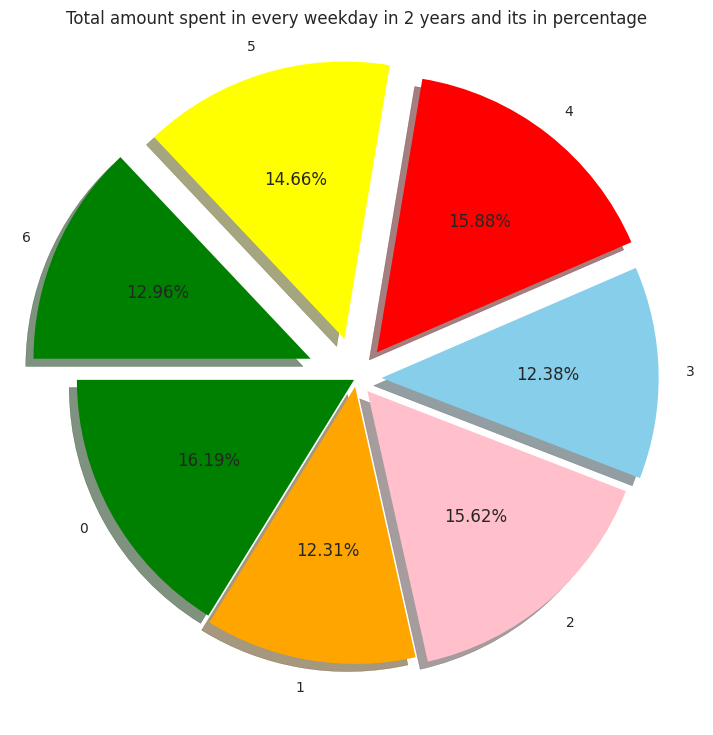

In [32]:
plt.figure(figsize=(9,9))
plt.pie(twd_money_spent.Expenses, labels= twd_money_spent.index,autopct="%1.2f%%", explode=[0.01,0.03, 0.06, 0.09, 0.12, 0.15, 0.18], shadow=True, startangle=180)
plt.title('Total amount spent in every weekday in 2 years and its in percentage');

<a id="5"></a>
# <p style="background-color:pink;font-family:verdana;color:black;font-size:120%;text-align:center;border-radius:20px 20px;">MODEL BUILDING</p>
***

<div class="alert alert-block alert-info" style="color:black; font-size:14px; font-family:verdana; line-height: 1.7em;">
    
Selecting the important features for model building.

In [33]:
subset = df1[["Income","Kidhome","Teenhome","Age","Marital_Status","Education"]]
print("Subset DataFrame is used to perform CLUSTERING")
print()
subset.head()

Subset DataFrame is used to perform CLUSTERING



,Income,Kidhome,Teenhome,Age,Marital_Status,Education
0,58138.0,0,0,57.0,Single,Post Graduate
1,46344.0,1,1,60.0,Single,Post Graduate
2,71613.0,0,0,49.0,With Partner,Post Graduate
3,26646.0,1,0,30.0,With Partner,Post Graduate
4,58293.0,1,0,33.0,With Partner,Post Graduate


In [34]:
df1["Marital_Status"].value_counts()

Marital_Status
With Partner         1444
Single                480
Without Partner       312
Others                  2
Life Style Choice       2
Name: count, dtype: int64

In [35]:
numerical_col = ["Income", "Age"]
ordinal_col = ["Marital_Status", "Education", "Kidhome", "Teenhome"]

ordinal_categories = [
    ["With Partner", "Single", "Without Partner", "Others", "Life Style Choice"],
    ["Under Graduate", "Post Graduate"],
    [0, 1, 2],
    [0, 1, 2]
]

numeric_pipeline = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('power_transformer', PowerTransformer())
])

ordinal_pipeline = Pipeline([
    ('ordinal_encoder', OrdinalEncoder(categories=ordinal_categories))
])

transformer_ = ColumnTransformer(transformers=[('num', numeric_pipeline, numerical_col),
                                               ('ordinal', ordinal_pipeline, ordinal_col)
                                              ])
transformer_data = transformer_.fit_transform(subset)

transformer_data

numeric_features = numerical_col
ordinal_features = ordinal_col

all_feature_names = np.concatenate([numeric_features, ordinal_features])

transformed_df = pd.DataFrame(transformer_data, columns=all_feature_names)

print("After preprocessing the data")
print()
transformed_df.head()

After preprocessing the data



,Income,Age,Marital_Status,Education,Kidhome,Teenhome
0,0.317857,1.006239,1.0,1.0,0.0,0.0
1,-0.245454,1.242591,1.0,1.0,1.0,1.0
2,0.944918,0.359468,0.0,1.0,0.0,0.0
3,-1.216165,-1.315842,0.0,1.0,1.0,0.0
4,0.325157,-1.039801,0.0,1.0,1.0,0.0


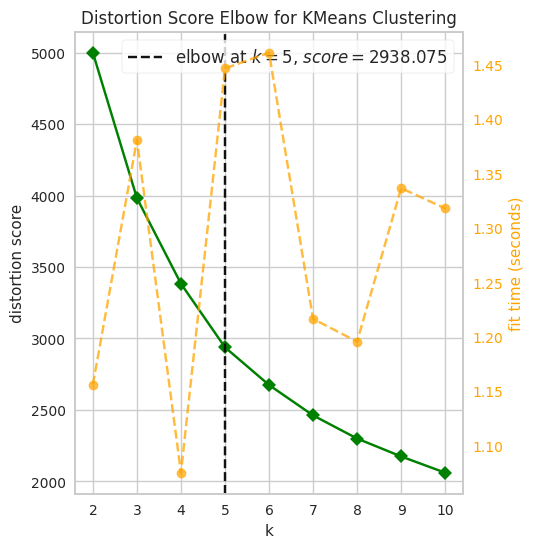

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
plt.figure(figsize = (5,6))
elbow_graph = KElbowVisualizer(KMeans(random_state=42),k=10)
elbow_graph.fit(transformed_df)
elbow_graph.show()

<div class="alert alert-block alert-info" style="color:black; font-size:14px; font-family:verdana; line-height: 1.7em;">
    
The distortion score is lowest when the number of clusters is 5. Therefore, we choose to use 5 clusters for the K-means algorithm.

In [37]:
silhouette_scores = []
clusters_model = []

for i in range(1, 200):
   
    kmeans_ = KMeans(n_clusters=5, random_state=42) 
    transformed_df[f'Clusters_5_{i}'] = kmeans_.fit_predict(transformed_df)
    silhouette_avg = silhouette_score(transformed_df, transformed_df[f'Clusters_5_{i}'])
    silhouette_scores.append(silhouette_avg)
    print(f"Iteration {i}: Average silhouette score: {silhouette_avg}")
    clusters_model.append(kmeans_)

Iteration 1: Average silhouette score: 0.38591652230153195
Iteration 2: Average silhouette score: 0.5217205198383399
Iteration 3: Average silhouette score: 0.5997274192989579
Iteration 4: Average silhouette score: 0.6306853801710217
Iteration 5: Average silhouette score: 0.6665912653805565
Iteration 6: Average silhouette score: 0.7022232140963413
Iteration 7: Average silhouette score: 0.7293430074082278
Iteration 8: Average silhouette score: 0.7435486612144682
Iteration 9: Average silhouette score: 0.751819070490198
Iteration 10: Average silhouette score: 0.7607391724648966
Iteration 11: Average silhouette score: 0.7662181580220292
Iteration 12: Average silhouette score: 0.7781125158314506
Iteration 13: Average silhouette score: 0.786438305703248
Iteration 14: Average silhouette score: 0.7924289344060175
Iteration 15: Average silhouette score: 0.796094568291241
Iteration 16: Average silhouette score: 0.8014629461763592
Iteration 17: Average silhouette score: 0.8080244531890173
Iteratio

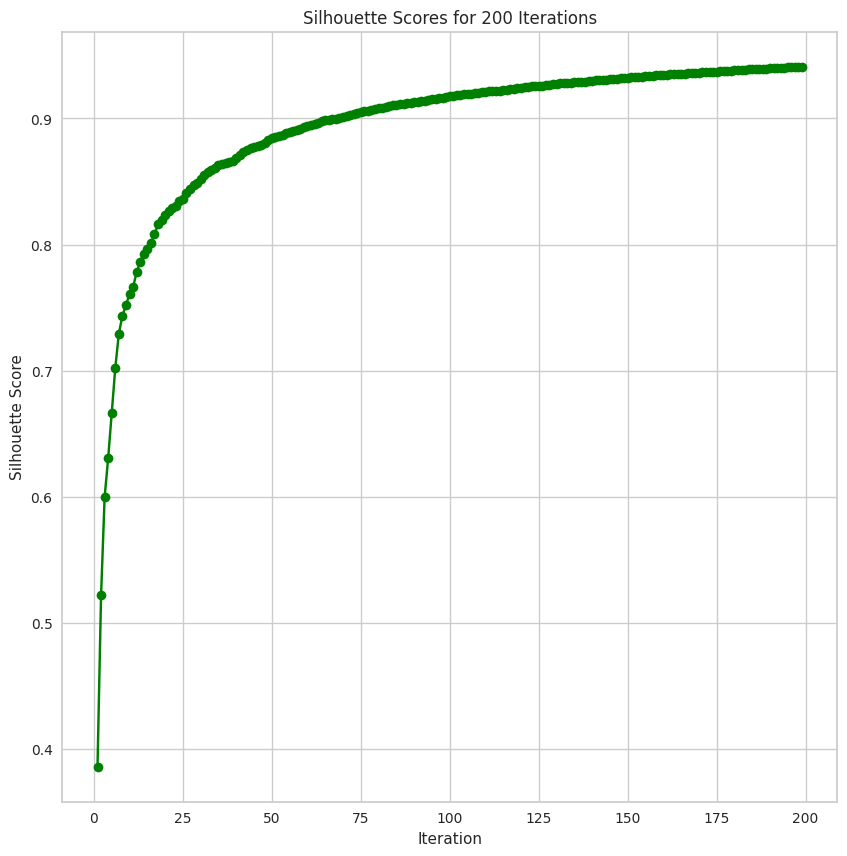

In [38]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, 200), silhouette_scores, marker='o')
plt.title('Silhouette Scores for 200 Iterations')
plt.xlabel('Iteration')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

<a id="6"></a>
# <p style="background-color:pink;font-family:verdana;color:black;font-size:120%;text-align:center;border-radius:20px 20px;">MODEL EVALUATION</p>
***

In [39]:
mean_score = np.mean(silhouette_scores)
median_score = np.median(silhouette_scores)
std_dev_score = np.std(silhouette_scores)

print(f"Mean Silhouette Score: {mean_score}")
print(f"Median Silhouette Score: {median_score}")
print(f"Standard Deviation of Silhouette Scores: {std_dev_score}")

Mean Silhouette Score: 0.8927967114011599
Median Silhouette Score: 0.9175903385781382
Standard Deviation of Silhouette Scores: 0.07150827088172687


In [40]:
best_iteration = np.argmax(silhouette_scores) + 1
best_score = max(silhouette_scores)

print(f"Best Iteration: {best_iteration} with Silhouette Score: {best_score}")

best_cluster_labels = transformed_df[f'Clusters_5_{best_iteration}']
print(best_cluster_labels.head())

Best Iteration: 199 with Silhouette Score: 0.940984965282641
0    1
1    3
2    1
3    0
4    2
Name: Clusters_5_199, dtype: int32


In [41]:
best_model = clusters_model[best_iteration - 1]  # Subtracting 1 to match the index in clusters_model list

joblib.dump(best_model, 'best_kmeans_model.pkl')
print("Best model saved successfully.")

Best model saved successfully.


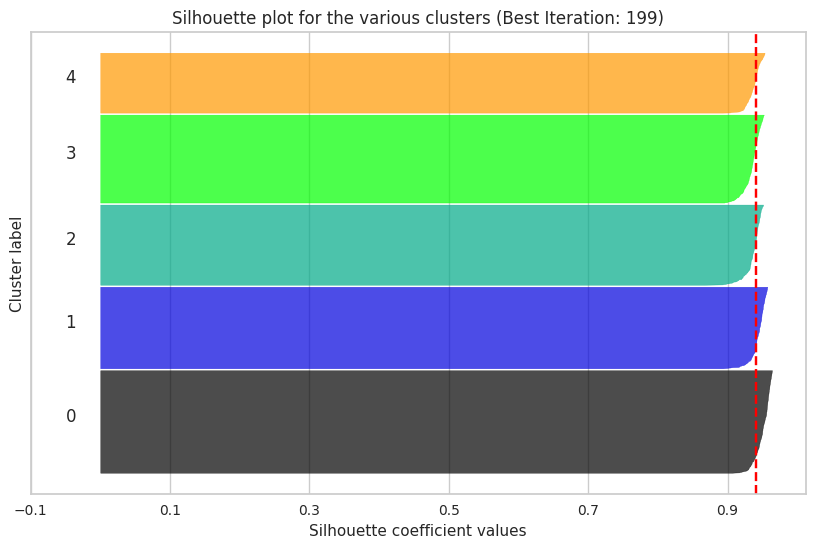

In [42]:
sample_silhouette_values = silhouette_samples(transformed_df, best_cluster_labels)

n_clusters = 5
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10

for i in range(n_clusters):
   
    ith_cluster_silhouette_values = sample_silhouette_values[best_cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

  
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

   
    y_lower = y_upper + 10  

ax.set_title(f"Silhouette plot for the various clusters (Best Iteration: {best_iteration})")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")


ax.axvline(x=best_score, color="red", linestyle="--")
ax.set_yticks([]) 
ax.set_xticks(np.arange(-0.1, 1.0, 0.2))

plt.show()

<div class="alert alert-block alert-info" style="color:black; font-size:14px; font-family:verdana; line-height: 1.7em;">
    
Based on my Silhouette coefficient values, there are no negative values, indicating that the K-means clustering model is well-clustered.

### Principal Component mapping

<Axes: xlabel='PCA1', ylabel='PCA2'>

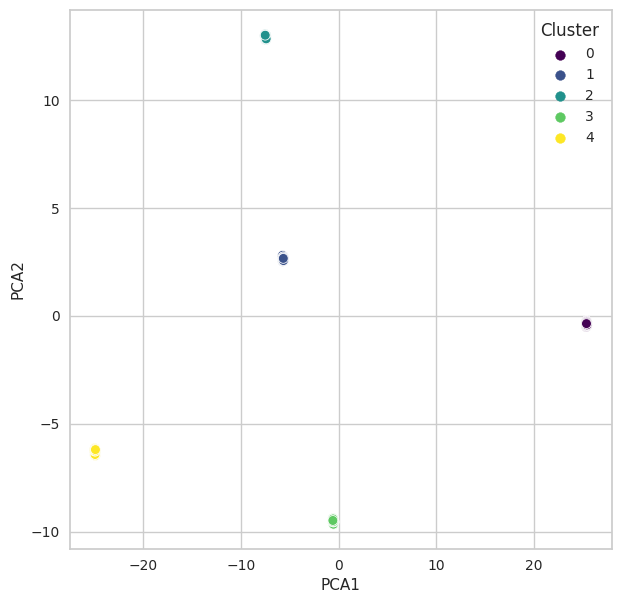

In [43]:
pca = PCA(n_components=2)
transformed_df_2d = pca.fit_transform(transformed_df)

plot_df = pd.DataFrame(transformed_df_2d, columns=['PCA1', 'PCA2'])
plot_df['Cluster'] = best_cluster_labels

plt.figure(figsize=(7, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=plot_df, s=50)

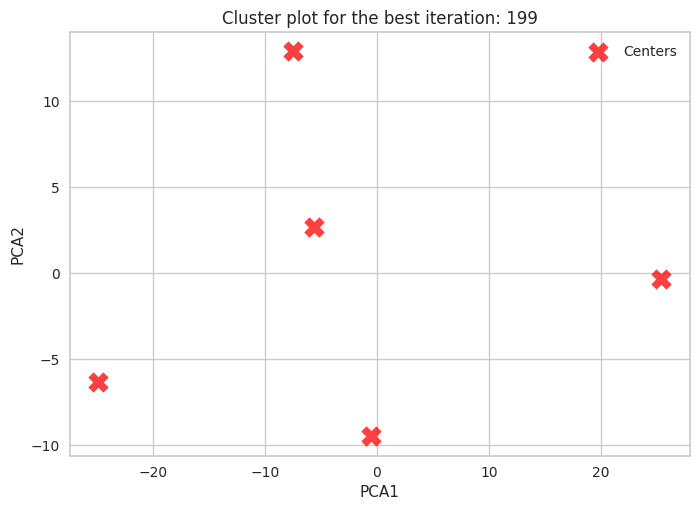

In [44]:
kmeans1 = KMeans(n_clusters=5, random_state=42).fit(transformed_df)
centers_2d = pca.transform(kmeans1.cluster_centers_)

plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centers')

plt.title(f"Cluster plot for the best iteration: {best_iteration}")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [45]:
label = transformed_df["Clusters_5_199"].copy()
subseted_df = subset.copy()

final_dataset = pd.concat([subseted_df, label], axis=1)

In [46]:
final_dataset.head()

,Income,Kidhome,Teenhome,Age,Marital_Status,Education,Clusters_5_199
0,58138.0,0,0,57.0,Single,Post Graduate,1
1,46344.0,1,1,60.0,Single,Post Graduate,3
2,71613.0,0,0,49.0,With Partner,Post Graduate,1
3,26646.0,1,0,30.0,With Partner,Post Graduate,0
4,58293.0,1,0,33.0,With Partner,Post Graduate,2


<a id="8"></a>
# <p style="background-color:pink;font-family:verdana;color:black;font-size:120%;text-align:center;border-radius:20px 20px;">CLUSTERING ANALYSIS</p>
***

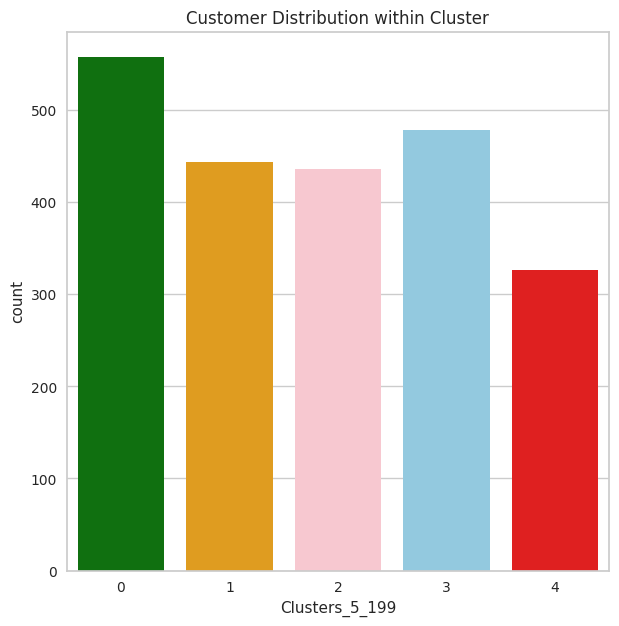

In [47]:
plt.figure(figsize=(7,7))
sns.countplot(x="Clusters_5_199", data=final_dataset)
plt.title("Customer Distribution within Cluster")
plt.show()

<div class="alert alert-block alert-info" style="color:black; font-size:14px; font-family:verdana; line-height: 1.7em;">

Plotting the Cluster Labels Predicted by the Model
    
 - The 0th cluster has the highest count of values.
 - The 4th cluster has the lowest count of values.

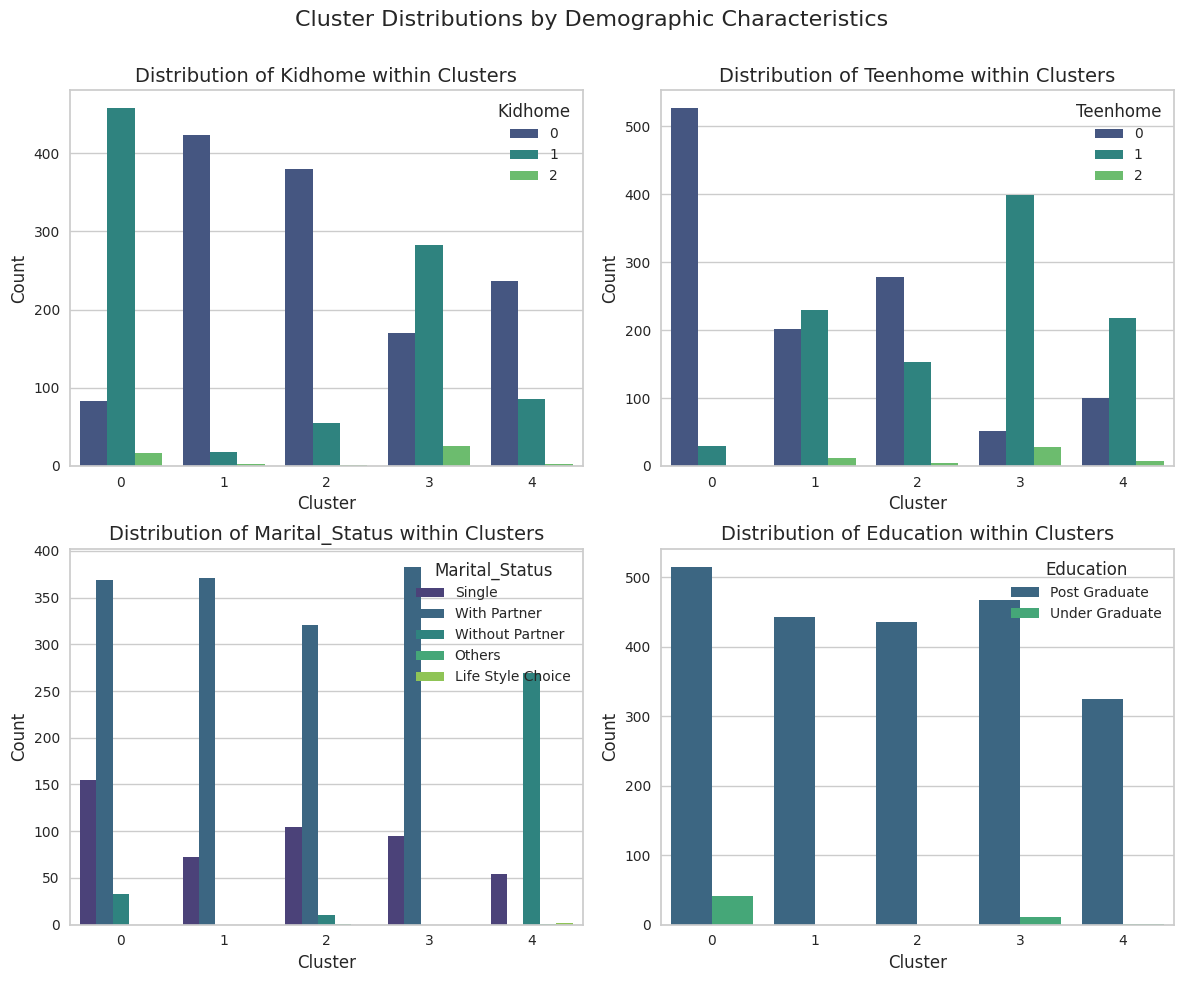

In [48]:
count_cols = ["Kidhome", "Teenhome", "Marital_Status", "Education"]

fig, ax1 = plt.subplots(2, 2, figsize=(12, 10)) 

for i, col in enumerate(count_cols):
    sns.countplot(x="Clusters_5_199", data=final_dataset, ax=ax1[i//2, i%2], hue=col, palette="viridis")
    ax1[i//2, i%2].set_title(f"Distribution of {col} within Clusters", fontsize=14)
    ax1[i//2, i%2].set_xlabel("Cluster", fontsize=12)
    ax1[i//2, i%2].set_ylabel("Count", fontsize=12)
    ax1[i//2, i%2].legend(title=col, loc='upper right') 

plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle("Cluster Distributions by Demographic Characteristics", fontsize=16)

plt.show()

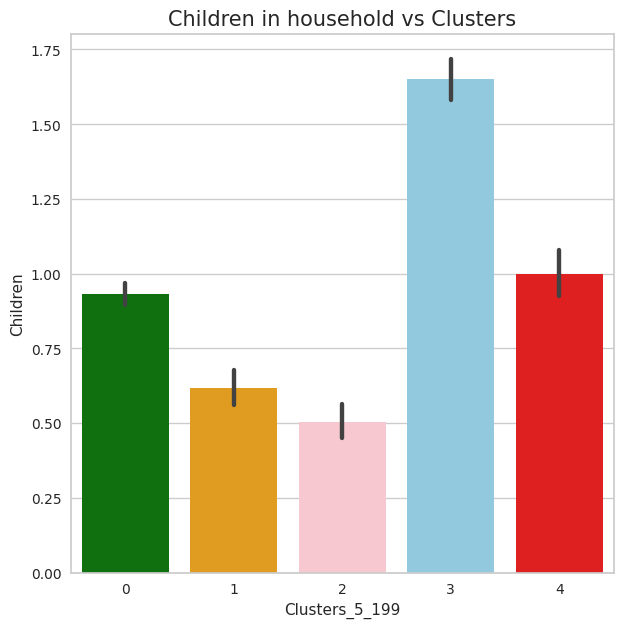

In [49]:
plt.figure(figsize=(7,7))
sns.barplot(x = final_dataset["Clusters_5_199"], y = df1["Children"])
plt.title("Children in household vs Clusters",size = 15)
plt.show()

<div class="alert alert-block alert-info" style="color:black; font-size:14px; font-family:verdana; line-height: 1.7em;">

Insights from the Children vs Cluster Plot
   - Cluster 3 has the highest number of children.
   - Cluster 2 has the lowest number of children.

In [50]:
cluster_summary = final_dataset.groupby('Marital_Status')['Clusters_5_199'].value_counts().unstack().fillna(0)

cluster_summary.columns = [f'Cluster_{int(col)}' for col in cluster_summary.columns]

print(cluster_summary)

                   Cluster_0  Cluster_1  Cluster_2  Cluster_3  Cluster_4
Marital_Status                                                          
Life Style Choice        0.0        0.0        0.0        0.0        2.0
Others                   0.0        0.0        1.0        0.0        1.0
Single                 155.0       72.0      104.0       95.0       54.0
With Partner           369.0      371.0      321.0      383.0        0.0
Without Partner         33.0        0.0       10.0        0.0      269.0


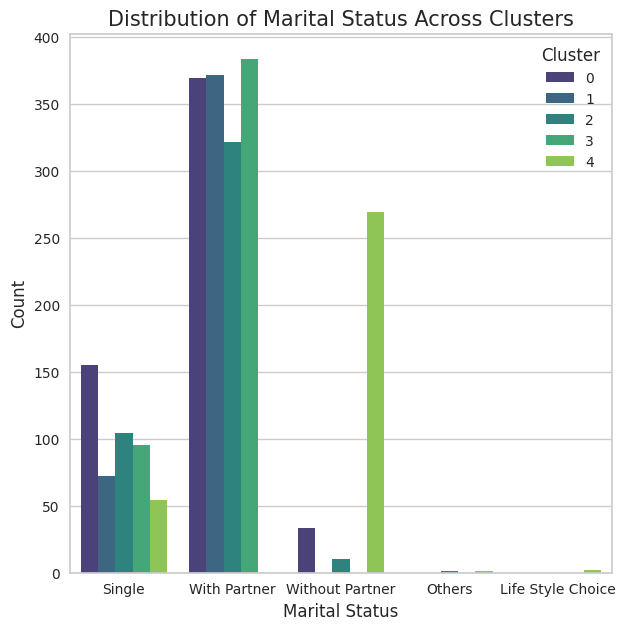

In [51]:
plt.figure(figsize=(7, 7))

sns.countplot(x="Marital_Status", hue="Clusters_5_199", data=final_dataset, palette="viridis")

plt.title("Distribution of Marital Status Across Clusters", fontsize=15)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.legend(title='Cluster', loc='upper right', fontsize=10)

plt.show()

In [52]:
cluster_summary = final_dataset.groupby('Marital_Status')['Clusters_5_199'].value_counts().unstack().fillna(0)

cluster_summary.columns = [f'Cluster_{int(col)}' for col in cluster_summary.columns]

print(cluster_summary)

                   Cluster_0  Cluster_1  Cluster_2  Cluster_3  Cluster_4
Marital_Status                                                          
Life Style Choice        0.0        0.0        0.0        0.0        2.0
Others                   0.0        0.0        1.0        0.0        1.0
Single                 155.0       72.0      104.0       95.0       54.0
With Partner           369.0      371.0      321.0      383.0        0.0
Without Partner         33.0        0.0       10.0        0.0      269.0


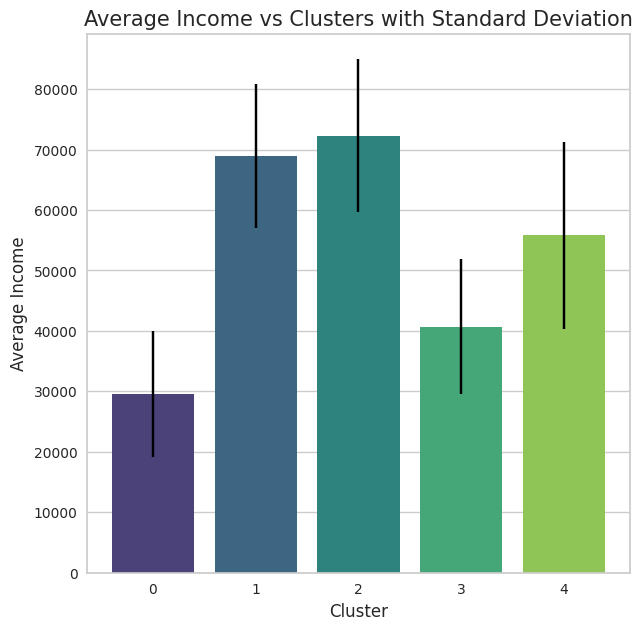

In [53]:
income_stats = final_dataset.groupby("Clusters_5_199")["Income"].agg(["mean", "std"]).reset_index()

plt.figure(figsize=(7, 7))

sns.barplot(x="Clusters_5_199", y="mean", data=income_stats, palette="viridis", ci=None)
plt.errorbar(x=income_stats["Clusters_5_199"], y=income_stats["mean"], yerr=income_stats["std"], fmt='none', c='black', capsize=5)

plt.title("Average Income vs Clusters with Standard Deviation", fontsize=15)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Average Income", fontsize=12)

plt.show()

<p style="background-color:pink;font-family:verdana;color:black;font-size:180%;text-align:center;border-radius:20px 20px;">
    From this bar plot, we can clearly see that:

 ##  Cluster 2 represents very high income.
 ## Cluster 1 corresponds to high income.
 ## Cluster 4 indicates middle income.
 ## Cluster 3 reflects low income.
 ## Cluster 0 shows very low income.


</p>

***

In [54]:
final_dataset["Clusters_5_199"].value_counts()

Clusters_5_199
0    557
3    478
1    443
2    436
4    326
Name: count, dtype: int64

<a id="9"></a>
# <p style="background-color:pink;font-family:verdana;color:black;font-size:120%;text-align:center;border-radius:20px 20px;">BUILDING MULTICLASSIFICATION MODEL BASED ON CLUSTER LABELS</p>
***

In [55]:
X = final_dataset.drop("Clusters_5_199",axis = 1)
y = final_dataset["Clusters_5_199"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)

In [58]:
final_pipeline = Pipeline([
    ('preprocessor', transformer_),
    ('model', model)
])

In [59]:
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
    'model__multi_class': ['ovr', 'multinomial']
}

In [60]:
grid_search = GridSearchCV(final_pipeline, param_grid, cv=5, scoring='accuracy')

In [61]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standard_scaler',
                                                                                          StandardScaler()),
                                                                                         ('power_transformer',
                                                                                          PowerTransformer())]),
                                                                         ['Income',
                                                                          'Age']),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('ordinal_encoder',
                                                                                          OrdinalEncoder(categories=[['With '
                                                                                                                      'Partner',
                                                                                                                      'Single',
                                                                                                                      'Without '
                                                                                                                      'Partner',
                                                                                                                      'Others',
                                                                                                                      'Life '
                                                                                                                      'Style '
                                                                                                                      'Choice'],
                                                                                                                     ['Under '
                                                                                                                      'Graduate',
                                                                                                                      'Post '
                                                                                                                      'Graduate'],
                                                                                                                     [0,
                                                                                                                      1,
                                                                                                                      2],
                                                                                                                     [0,
                                                                                                                      1,
                                                                                                                      2]]))]),
                                                                         ['Marital_Status',
                                                                          'Education',
                                                                          'Kidhome',
                                                                          'Teenhome'])])),
                                       ('model',
                                        LogisticRegression(max_iter=200,
                                                           multi_class='ovr'))]),
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                        

In [62]:
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

Best parameters: {'model__C': 100, 'model__multi_class': 'multinomial', 'model__solver': 'lbfgs'}
Best cross-validation accuracy: 0.9944227447440905


In [63]:
y_pred = best_model.predict(X_test)

In [64]:
report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

print(report_df)

              precision  recall  f1-score  support
0                   1.0     1.0       1.0     92.0
1                   1.0     1.0       1.0     89.0
2                   1.0     1.0       1.0     96.0
3                   1.0     1.0       1.0     98.0
4                   1.0     1.0       1.0     73.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    448.0
weighted avg        1.0     1.0       1.0    448.0


In [65]:
accuracy = accuracy_score(y_test, y_pred)
weighted_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Weighted F1 Score: {weighted_f1:.2f}")

Accuracy: 1.00
Weighted F1 Score: 1.00


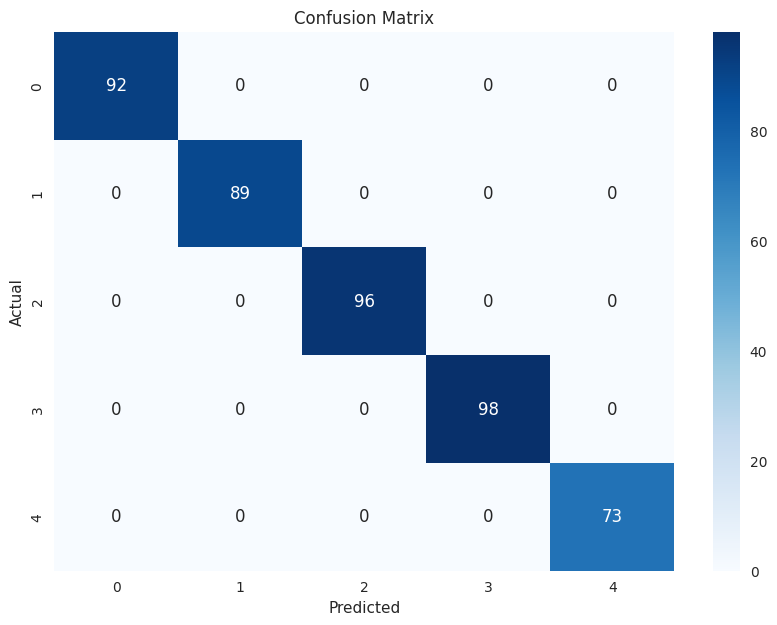

In [66]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.named_steps['model'].classes_, yticklabels=best_model.named_steps['model'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [67]:
joblib_file = "Cluster_Classification_model.joblib"
joblib.dump(final_pipeline, joblib_file)

['Cluster_Classification_model.joblib']

<a id="10"></a>
# <p style="background-color:pink;font-family:verdana;color:black;font-size:120%;text-align:center;border-radius:20px 20px;">CONCLUSION</p>
***

### In this project, we successfully performed customer segmentation based on income, utilizing various techniques and visualizations to better understand customer behavior.

***

## Data Preparation: 
 ### We began by cleaning and preprocessing the dataset to ensure accurate analysis. This included handling missing values and normalizing the income data.
***


## Income Categorization:
 ### We categorized customers into five distinct income groups:

 -  Very Low Income
 - Low Income
 - Middle Income
 - High Income
 - Very High Income
### This categorization allows for targeted marketing strategies tailored to each income group.
***

## Clustering Analysis:
 ### Using clustering algorithms, we grouped customers based on their income characteristics. The analysis revealed clear distinctions among different clusters, which aids in understanding customer segments more effectively.
***

## Visualization:
 ### The bar plots and other visualizations provided intuitive insights into the distribution of income across clusters.
 ### For instance, we found that:

 - Cluster 2 has very high income,
 - Cluster 1 has high income,
 - Cluster 4 has middle income,
 - Cluster 3 has low income,
 - Cluster 0 has very low income.
***

## Business Implications:
 ### The segmentation provides valuable insights for businesses to tailor their marketing strategies, product offerings, and customer service initiatives based on the specific needs and behaviors of each income group.

<p style="background-color:red;font-family:verdana;color:white;font-size:150%;text-align:center;border-radius:20px 20px;">Thank you😊 for visiting my notebook🗒️. If you found it helpful, please consider upvoting it!🤩

## If you have any questions❓ or need further assistance📐, feel free to contact me on [LinkedIn](https://www.linkedin.com/in/sanjay-l-15663a224).